# Tutorial on Satellite Image Processing using Python and GDAL

## Introduction

This tutorial is an introduction to some basic methodoogies of processing satellite images using python and an open soure library called GDAL.

## Tutorial content

We will cover the following topics in this tutorial:
- [Installing the libraries](#Installing-the-libraries)
- [Introduction to Remote Sensing and Geospatial Data](#Introduction-to-Remote-Sensing-and-Geospatial-Data)
- [Landsat 8 Satellite Imagery](#Landsat-8-Satellite-Imagery)
- [Loading the image](#Loading-the-image)
- [Calculating a spectral index](#Calculating-a-spectral-index)
- [Plotting multispectral images](#Plotting-multispectral-images)
- [Unsupervised Image Classification](#Unsupervised-Image-Classification)

## Installing the libraries

Before getting started, we need to make sure that all the required libraries and dependencies are installed on your system. The libraries we will be using are `Numpy`, `Matplotlib`, `GDAL`, `scikit-image`, and `scikit-learn`.

To download and install Anaconda visit: [Python - Anaconda](https://conda.io/docs/user-guide/install/download.html)
Once you're Anaconda python distribution is set up you will already have all the libraries used in this tutorial excep GDAL.

To install GDAL, open Anaconda prompt and use the conda package installer:

    $ conda install gdal

In [183]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from osgeo import gdal
print("GDAL's version is: " + gdal.__version__)

GDAL's version is: 2.2.2


## Introduction to Remote Sensing and Geospatial Data

__Remote Sensing__ In modern usage, Remote Sensing usually refers to the process of collecting information using sensors onboard satellites or aircrafts for detection or monitoring. It can be classified as active remote sensing (when the signal is emitted by the satellite or aircraft itself or passive remote sensing (when the sensor onboard the satellite or aircraft measures the the electromagnetic radiation from the sun (sunlight) reflected from an object). Remote Sensing is extensively used for detection, monitoring and classification of objects on the earth's surface, atmosphere and oceans in fields such as geography, land surveying, most Earth Science disciplines as well as social sciences, economics, planning, military etc. 


[<img src="https://upload.wikimedia.org/wikipedia/commons/6/61/Remote_Sensing_Illustration.jpg" width="375">](https://upload.wikimedia.org/wikipedia/commons/6/61/Remote_Sensing_Illustration.jpg)


__Geospatial Data__ is any form data that has a spatial or geolocation aspect to it. Geospatial data is commonly analysed and processed in Geographic Information Systems, which are software suites for visualizing, managing, and processing geospatial data. Geospatial data is of two types:
 - Vector Data
 - Raster Data
 
 
*Vector data* is data made up of points, lines and polygons. It could be the outline of a country, state, city, a map of the road network etc. *Raster data* on the other hand is geospatial data made up of pixels. Each pixel has a value which in the case of satellite image is the value of the reflectance measured by the onboard sensor. 

## Landsat 8 Satellite Imagery

Landsat 8 is an Earth Observation satellite launched jointly by NASA and the United States Geological Survey (USGS) in 2013. It provides modern resolution satellite imagery of the Earth's surface in various bands of the EM spectrum. The images delivered by the satellite are processed and are freely available to download from [Earth Explorer](https://earthexplorer.usgs.gov/) website.

We use the following Landsat 8 scene of part of New York City and some surrounding areas :

[<img src="https://earthexplorer.usgs.gov/browse/landsat_8/2017/014/032/LC08_L1TP_014032_20171018_20171025_01_T1.jpg" width="375">](https://earthexplorer.usgs.gov/browse/landsat_8/2017/014/032/LC08_L1TP_014032_20171018_20171025_01_T1.jpg)


Landsat Scene Identifier: LC80140322017291LGN00
Acquisition Date: 2017/10/18
Path, Row Coordinates: 014, 032

We will use a GeoTiff format image with the image clipped around the area of New York City and containing the stacked spectral bands 1-7 of the original scene. The various spectral bands in the image are:

| Bands |  Wavelength (micrometers)  | Resolution (meters) |
|------|------|------|
|Band 1 - Ultra Blue (coastal/aerosol)|	0.435 - 0.451|	30|
|Band 2 - Blue|	0.452 - 0.512	|30|
|Band 3 - Green|	0.533 - 0.590	|30|
|Band 4 - Red|	0.636 - 0.673	|30|
|Band 5 - Near Infrared (NIR)|	0.851 - 0.879	|30|
|Band 6 - Shortwave Infrared (SWIR) 1|	1.566 - 1.651	|30|
|Band 7 - Shortwave Infrared (SWIR) 2|	2.107 - 2.294	|30|




## Introduction to GDAL - Geospatial Data Abstraction Library

GDAL is an open source software library for processiong raster and vector geospatial data formats. It is released under an X/MIT style Open Source license by the Open Source Geospatial Foundation. As a library, it presents a single raster abstract data model and single vector abstract data model to the calling application for all supported formats. It also comes with a variety of useful command line utilities for data translation and processing. It is a powerful library and has become the most popular for processing geospatial data because of the number of data formats it supports and the languages for which it has bindings.
Almost all of the geospatial ibraries in the python package index depend on GDAL. Some of the main reasons why it is used is:
 - GDAL library is accessible through C, C++, and Python
 - Reads and writes rasters
 - Converts image, in memory, into a format Numpy arrays
 - Propagates projection and transformation information

One of the most important components of the GDAL library is the `GDALDataset` class, which holds all the information which you might want about a raster dataset as well as functions that you might want to perform on a raster image. 

Some of the class methods include:
- `GetRasterBand`
- `GetGeoTransform`
- `GetProjection`

We will see some of these class methods that allow you to access the attributes of the raster dataset. There are also methods that allow you to operate on the raster image and set the class attributes such as `SetProjection` which allows you to set the geographic projection of the image. 

## Loading the image

We can load the satellite image using GDAL and create a `GDALDataset` object. As the name suggests, we can open an image with the "Open" function within `gdal`.

We will use the Landsat 8 satellite image scene described above which is hosted on the following google drive [link](https://drive.google.com/open?id=1b-UiN31ss5dnDteqvbcB3pV93a3Qo1lD). We will assume that you have the image downloaded and in the same folder as the Jupyter Notebook. 

In [205]:
data = gdal.Open('nyc.tif', gdal.GA_ReadOnly)
print(data)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000023CBA25D810> >


### Image Attributes

Now that we have our raster image loaded intro the variable *data* let's explore some of its attributes.

In [206]:
# What is the number of spectral bands in the image?
num_bands = data.RasterCount
print('The number of spectral bands in the image: {x}\n'.format(x=num_bands))

# How many rows and columns does the image contain?
row = data.RasterYSize
col = data.RasterXSize
print('The size of the image is: {r} rows x {c} columns\n'.format(r=row, c=col))

# Does our raster image have a description or metadata?
desc = data.GetDescription()
meta = data.GetMetadata()
print('Raster file description: ')
print(desc)
print('\n')
print('Raster metadata:')
print(meta)
print('\n')

# What image format driver (e.g., ENVI driver, GeoTIFF driver, HDF driver) was used to open the raster?
driver = data.GetDriver()
print('The image format driver used to open the raster file: {d}\n'.format(d=driver.ShortName))

# What is the raster image's geographic projection?
proj = data.GetProjection()
print('Image projection:')
print(proj + '\n')

# What is the raster image's "geo-transform"?
gt = data.GetGeoTransform()
print('Image geo-transform: {gt}\n'.format(gt=gt))

The number of spectral bands in the image: 7

The size of the image is: 2509 rows x 3017 columns

Raster file description: 
nyc.tif


Raster metadata:
{'AREA_OR_POINT': 'Area', 'DataType': 'Generic'}


The image format driver used to open the raster file: GTiff

Image projection:
PROJCS["WGS_1984_UTM_zone_18N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32618"]]

Image geo-transform: (515685.0, 30.0, 0.0, 4538505.0, 0.0, -30.0)



The number of bands, size of the raster, description and metadata are self-explanatory. 

The coordinate system that the raster image is projected in is given by the `GetProjection` method. As can be seen this raster is projected in the `WGS_1984_UTM_zone_18N` refernce system. For more information on specific geographic and projected coordinate systems and format conversions see [Spatial Reference](http://www.spatialreference.org).

The very last item of information we got is called a "geotransform". It is a set of 6 numbers that provides all the information about the relation between each pixel and the projected coordinate system. The pixel size in both x and y dimensions of the raster image is listed as the second (30) and the sixth (-30) numbers. This means that our image has a spatial resolution of 30m i.e. each pixel on the image holds the reflectance value of an area of 30m X 30m on the earth's surface. For more information on the [GDAL data model](http://www.gdal.org/gdal_datamodel.html), follow the link.

#### Image spectral bands

The `GDALDataset` object that we created contains lots of useful information but we need to access each spectral band in the raster image individually using the method `GetRasterBand`:

In [207]:
# Open the blue band in our image
blue = data.GetRasterBand(2)
print(blue)
nodata = blue.GetNoDataValue()
print("NoData value of pixels: ")
print(nodata)

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x0000023CDB5AE1B0> >
NoData value of pixels: 
0.0


The NoData value of the pixels is the value that represents the absence of any data in those pixels.

Similar to the attributes of the `GDALDataset`, let's explore some attributes and methods of the `GDALRasterBand`:

In [208]:
# What is datatype of the values stored in the band?
dt = blue.DataType
print('Band datatype: {d}'.format(d=dt))

# The number that printed out is the way GDAL keeps track of various data types, but there's a more useful definition for use:
datatype_name = gdal.GetDataTypeName(dt)
print('Band datatype: {t}'.format(t=datatype_name))

# Let's see how much space this datatype takes up
bytes = gdal.GetDataTypeSize(dt)
print('Band datatype size: {b} bytes\n'.format(b=bytes))

# We can use GetStatistics method to get some band spectral statistics
band_min, band_max, band_mean, band_stddev = blue.GetStatistics(0, 1)
print('Band range: {minimum} to {maximum}'.format(minimum=band_min,
                                                 maximum=band_max))
print('Band mean, standard deviation: {m}, {s}\n'.format(m=band_mean, s=band_stddev))

Band datatype: 2
Band datatype: UInt16
Band datatype size: 16 bytes

Band range: 5112.0 to 47508.0
Band mean, standard deviation: 8134.840973348869, 764.9094578739595



For most applications, we will need to use GDAL to read our raster image and store raster bands into memory in the form of a numpy ndarray which allows us to store our data in a memory efficient way. 
To read our band into these `np.array` objects, we will use the `ReadAsArray` method from our `GDALRasterBand` object:

In [209]:
#Access help for any method in the following way:
help(blue.ReadAsArray)

Help on method ReadAsArray in module osgeo.gdal:

ReadAsArray(xoff=0, yoff=0, win_xsize=None, win_ysize=None, buf_xsize=None, buf_ysize=None, buf_type=None, buf_obj=None, resample_alg=0, callback=None, callback_data=None) method of osgeo.gdal.Band instance
    Reading a chunk of a GDAL band into a numpy array. The optional (buf_xsize,buf_ysize,buf_type)
    parameters should generally not be specified if buf_obj is specified. The array is returned



In [210]:
blue_data = blue.ReadAsArray()
print(blue_data)
print('\n')
print('Blue band mean is: {m}'.format(m=blue_data.mean()))
print('Size is: {sz}'.format(sz=blue_data.shape))

[[   0    0    0 ...,    0    0    0]
 [7869 7858 7921 ..., 8073 8504 7958]
 [7845 7827 7896 ..., 8624 8159 7879]
 ..., 
 [7760 7766 7949 ..., 7744 7736 7749]
 [7750 7792 8059 ..., 7725 7734 7743]
 [   0    0    0 ...,    0    0    0]]


Blue band mean is: 8128.356444872704
Size is: (2509, 3017)


Now that our band is stored as a ndarray let us also visualize the blue spectral band of our image. 

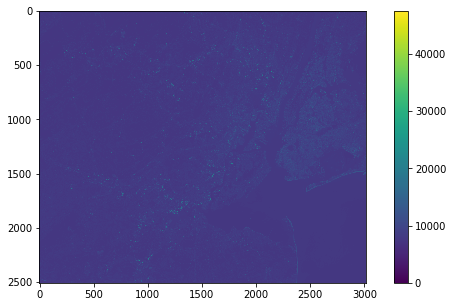

In [201]:
plt.figure(figsize=(10,5))
plt.imshow(blue_data)
plt.colorbar()

Notice it is hard to make anything out from visualizing a single spectral band. This is precisely why band combinations are so sueful. More on those later.

With our band data read into a NumPy array, we can print it to console and even perform statistics on it. In addition to helping us store massive amounts of data efficiently, NumPy will help us with some basic linear algebra, numerical operations, and summary statistics.

Now let's read all of our bands into a single 3D NumPy array (rows x cols x bands). For this, we will loop over all bands in our raster image dataset and read them into a newly allocated 3 dimensional ndarray:

In [214]:
# Initialize a 3d array -- use the size properties of our image for portability!
image = np.zeros((data.RasterYSize, data.RasterXSize, data.RasterCount))

# Loop over all bands in dataset
for b in range(data.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = data.GetRasterBand(b + 1)
    
    # Read in the band's data into the third dimension of our array
    image[:, :, b] = band.ReadAsArray()

#print(image)
#print(image.dtype)

If you noticed in the above blue band array there were some zero values on the edge pixels. As we saw before these 0 values correspond to NoData pixels. So let's choose a smaller subset of the image so that the 0 values of the edge pixels do not interfere in statistics

In [215]:
img = image[5:2505, 4:3014, :]
#print(image.shape)
print(img)
print(img.dtype)
print(img.shape)

(2509, 3017, 7)
[[[  8495.   7749.   7064. ...,  11485.   9793.   7414.]
  [  8512.   7788.   7039. ...,  11428.   9856.   7497.]
  [  8498.   7769.   7038. ...,  11512.   9819.   7441.]
  ..., 
  [  8454.   7640.   6876. ...,  11950.   8747.   6553.]
  [  8472.   7688.   6950. ...,  11636.   9189.   6820.]
  [  8439.   7669.   6896. ...,  11117.   8632.   6737.]]

 [[  8517.   7767.   7037. ...,  10601.   9602.   7514.]
  [  8524.   7785.   7023. ...,  10444.   9717.   7584.]
  [  8514.   7778.   7009. ...,  10236.   9745.   7642.]
  ..., 
  [  8449.   7652.   6833. ...,  12271.   8561.   6444.]
  [  8433.   7650.   6871. ...,  12376.   8706.   6468.]
  [  8478.   7646.   6844. ...,  12457.   8691.   6483.]]

 [[  8542.   7776.   7009. ...,   9991.   9464.   7540.]
  [  8538.   7795.   7022. ...,  10018.   9905.   7692.]
  [  8528.   7785.   7025. ...,  10072.  10025.   7730.]
  ..., 
  [  8452.   7628.   6832. ...,  12788.   9012.   6515.]
  [  8485.   7710.   6998. ...,  13965.   95

## Calculating a spectral index

Now that we have all our bands loaded into an ndarray object, let us do some analysis relating to the spectral information contained in the image. The [Normalized Difference Vegetation Index (NDVI)](http://en.wikipedia.org/wiki/NDVI) is a simple spectral index that is used to assess whether the image contains live vegetation or not. It makes use of the fact that live and healthy vegetation reflects highly in the Near Infrared band of the spectrum. Its value ranges betwee -1 and 1 and a high value of NDVI shows the presence of more vegetation. This index is extremely important and used commonly in monitoring land covers and vegetation from satellite images. 

he NDVI is calculated from these individual measurements as follows:

$$NDVI =  \frac{NIR - Red}{NIR + Red}$$

In [194]:
print('Red band mean: {r}'.format(r=img[:, :, 3].mean()))
print('NIR band mean: {nir}'.format(nir=img[:, :, 4].mean()))

Red band mean: 0.0
NIR band mean: 0.0


In [119]:
b_red = 3
b_nir = 4
ndvi = (img[:, :, b_nir] - img[:, :, b_red]) / \
        (img[:, :, b_nir] + img[:, :, b_red]).astype(np.float64)

print('NDVI matrix: ')
print(ndvi)

print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))

NDVI matrix: 
[[ 0.26340685  0.26102069  0.26554169 ...,  0.30487006  0.28987917
   0.27196796]
 [ 0.230671    0.22481529  0.21344319 ...,  0.32867739  0.3290378
   0.33601459]
 [ 0.20555053  0.20517293  0.2059387  ...,  0.34179739  0.37308884
   0.37216295]
 ..., 
 [ 0.35765986  0.36858795  0.34429382 ..., -0.04383246 -0.04397943
  -0.04396384]
 [ 0.31857446  0.41176471  0.3318472  ..., -0.04578527 -0.04343972
  -0.04272446]
 [ 0.31891777  0.42239894  0.36312959 ..., -0.04358611 -0.04350908
  -0.04393953]]

Max NDVI: 0.5953346855983773
Mean NDVI: 0.17906873938996884
Median NDVI: 0.21698360930946356
Min NDVI: -0.27782387104421


In [217]:
#The shape of the ndvi matrix is the same as the shape of the img matrix
ndvi.shape

(2500, 3010)

Now let's visualize this NDVI vegetation index by plotting the feature. We will visualize the vegetation index by using a colour map that translates high NDVI to a dark green colour and red color on the opposite end of the index.

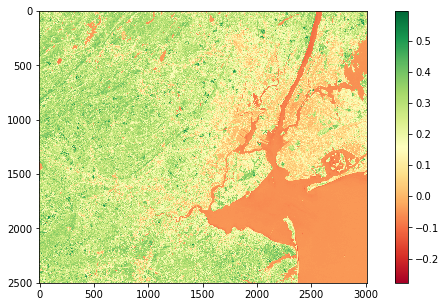

In [221]:
plt.figure(figsize=(10,5))
plt.imshow(ndvi, cmap = 'RdYlGn')
plt.colorbar()

For a greyscale image, we can also manually specify a color map:

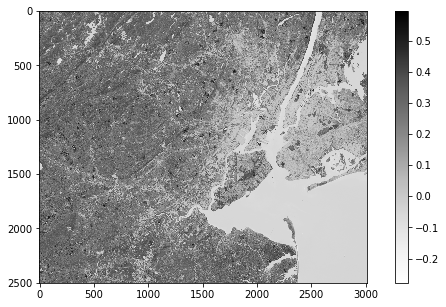

In [222]:
plt.figure(figsize=(10,5))
plt.imshow(ndvi, cmap = plt.cm.Greys)
plt.colorbar()

## Plotting multispectral images

The most interesting thing about working with satellite images is looking at the different band combinations and the different features we can visualize through these combinations. We can accomplish this, by mapping different spectral bands to the Red, Green, and Blue channels of our monitors.

But before we do this, the `matplotlib` `imshow` help section tells us that we need to [normalize](http://en.wikipedia.org/wiki/Normalization_%28image_processing%29) our spectral bands into a 0 - 1 range. For this, we will use a simple linear scale mapping 0 reflectance to 0 and 80% reflectance to 1 thus removing anything smaller or larger.

    Note:

    Since we are mapping from a Int16 datatype (reflectance scaled by 10,000x) to a decimal value between 0 and 1, we will 
    need to use Float!

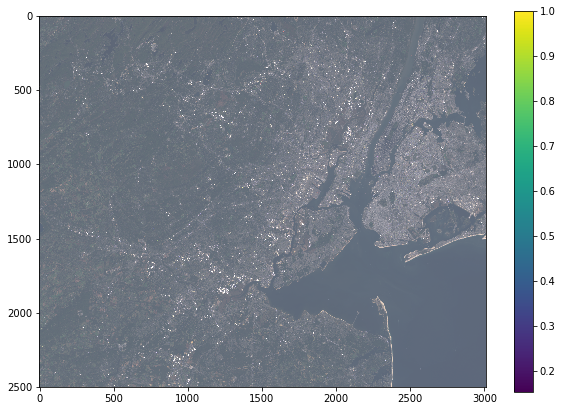

In [243]:
# Extract reference to SWIR1, NIR, and Red bands
index = np.array([3, 2, 1])
colors = img[:, :, index].astype(np.float64)

max_val = 16000
min_val = 0

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[2]):
    colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)
plt.figure(figsize=(10,7))
plt.imshow(colors)
plt.colorbar()

This band combination of Red, Green, Blue gives a natural colour image : or in other words how the earth looks naturally from Space! The white haziness you see on the picture is the distortion due to the atmosphere. If the image were completely corrected of atmospheric effects it would as clear as a high definition photograph with true colours.

Let us see another band combination : False Color. This combination of Short-wave infrared 1, Short-wave Infrared 2 and Red bands mapped to the RGB channels respectively is useful for highlighting the urban or built up land areas.

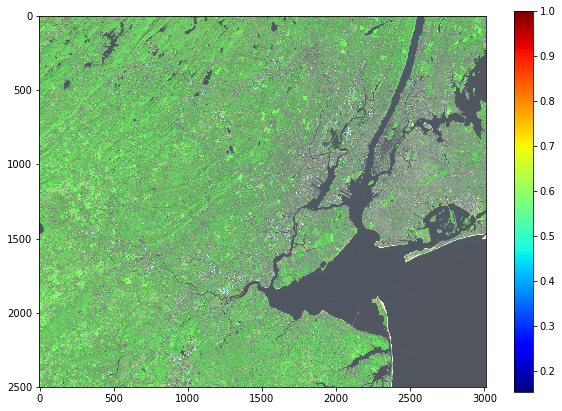

In [250]:
# Extract reference to SWIR2, SWIR1, and Red bands
index = np.array([6, 4, 3])
colors = img[:, :, index].astype(np.float64)

max_val = 16000
min_val = 0

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[2]):
    colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)
plt.figure(figsize=(10,7))
plt.imshow(colors, cmap = 'jet')
plt.colorbar()

## Unsupervised Image Classification

Next we will take a look at a classification task. We will make use of a satellite image with 3 spectral bands and in the form of a png image file available [here](https://i.stack.imgur.com/TFOv7.png)

We will employ unsupervised learning in the form of KMeans clustering to classify the pixels in to three classes : Green Vegetation, Urban built-up land, and Water. We will then map these three classes to the green, red and blue colours for visualization. We will use the KMeans algorithm provided in the [scikit-learn](http://scikit-learn.org) library. `Scikit-learn` is a very popular machine learning library that provides convenient and consistent interfaces to most of the popular machine learning algorithms.

(300, 300, 3)
<class 'numpy.uint8'>


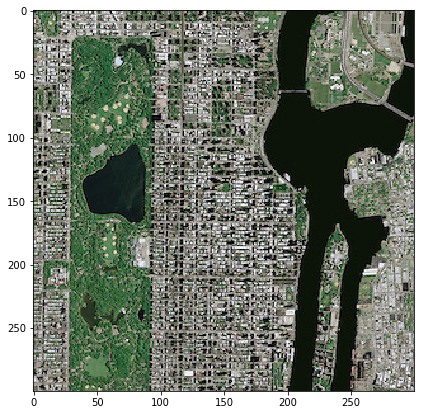

In [272]:
from skimage import io

train_classes = {'green': 0, 'building': 1, 'water': 2}
num_classes = len(train_classes)
mapping = np.uint8([[0, 255, 0], [255, 0, 0], [0, 0, 255]])

image_file = io.imread('image.png')
row, col, num_bands = im.shape
plt.figure(figsize=(10,7))
plt.imshow(image_file)
print(image_file.shape)
print(type(image_file[0,0,0]))

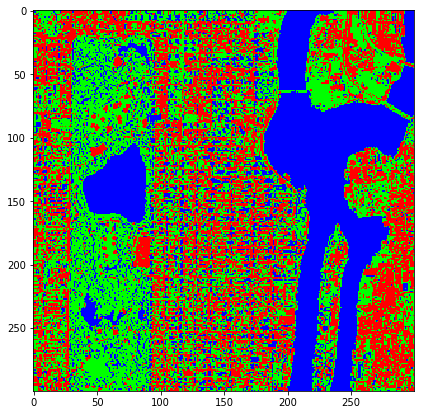

In [273]:
X_features = im.reshape(row*col, num_bands)
model = KMeans(n_clusters=num_classes, random_state=0).fit(X_features)
unsup_class = model.labels_.reshape(row, col)
plt.figure(figsize=(10,7))
plt.imshow(mapping[unsup_class])

## Summary and resources

This tutorial highlighted a few processing methodologies for satellite image data using python and GDAL library. We also used an unsupervised classification algorithm to classify a satellite image. There are many resources for information on remote sensing and handling geospatial data with python, some of which i highlight here:

- [Geoprocessing with Python using Open Source GIS course from Utah State University](http://www.gis.usu.edu/~chrisg/python/2009/)
- [Python GDAL/OGR cookbook](http://pcjericks.github.io/py-gdalogr-cookbook/)
- [GDAL API tutorial](http://www.gdal.org/gdal_tutorial.html)
- [Python API for GDAL](http://gdal.org/python/)